In [1]:
from passengers import Passengers, Line

lines = {}

file_name = 'data/t091307.xlsx'
line = '田園都市線'
skip_rows = list(range(0, 11)) + list(range(12, 15))
use_cols = list(range(1, 100))
lines[line] = Line(file_name, line, skip_rows, use_cols)

file_name = 'data/t091306.xlsx'
line = '東横線'
skip_rows = list(range(0, 12)) + list(range(13, 16))
use_cols = list(range(1, 100))
lines[line] = Line(file_name, line, skip_rows, use_cols)

file_name = 'data/t091305.xlsx'
line = '京浜急行線'
skip_rows = list(range(0, 12)) + list(range(13, 16))
use_cols = list(range(1, 100))
lines[line] = Line(file_name, line, skip_rows, use_cols)

file_name = 'data/t091304.xlsx'
line = '相模鉄道線'
skip_rows = list(range(0, 12)) + list(range(13, 16))
use_cols = list(range(1, 100))
lines[line] = Line(file_name, line, skip_rows, use_cols)

file_name = 'data/t091303.xlsx'
line = 'みなとみらい線'
skip_rows = list(range(0, 11)) + list(range(12, 15))
use_cols = list(range(1, 100))
lines[line] = Line(file_name, line, skip_rows, use_cols)

file_name = 'data/t091302.xlsx'
line = '金沢シーサイドライン'
skip_rows = list(range(0, 11)) + list(range(12, 15))
use_cols = list(range(1, 100))
lines[line] = Line(file_name, line, skip_rows, use_cols)

file_name = 'data/t091203.xlsx'
line = 'グリーンライン'
skip_rows = list(range(0, 11)) + list(range(12, 15))
use_cols = list(range(1, 100))
lines[line] = Line(file_name, line, skip_rows, use_cols)

file_name = 'data/t091202.xlsx'
line = 'ブルーライン'
skip_rows = list(range(0, 11)) + list(range(12, 15))
use_cols = list(range(1, 100))
lines[line] = Line(file_name, line, skip_rows, use_cols)

ps = Passengers()
for line in lines.values():
    ps.read_csv(line=line)
display(ps.passengers.head())

/Users/toh/Documents/GitHub/Yokohama-passengers/passengers.py:57: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df_sheet = df_sheet.convert_objects(convert_numeric=True)
/Users/toh/Documents/GitHub/Yokohama-passengers/passengers.py:93: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, df_sheet])


skip H19


あざみ野     いずみ中央      いずみ野     こどもの国     たまプラーザ    みなとみらい  \
2008-05-01  3394026.0  254876.0  243144.0  180451.0  1114264.0  829651.0   
2008-06-01  3356863.0  254045.0  240555.0  164730.0  1107780.0  815157.0   
2008-07-01  3274373.0  252736.0  233483.0  151528.0  1096439.0  844825.0   
2008-08-01  3109425.0  238522.0  229294.0  153481.0   987567.0  874165.0   
2008-09-01  3240686.0  238821.0  239541.0  157440.0  1078020.0  811747.0   

            みなとみらい線総数     ゆめが丘  グリーンライン総数     センター北    ...           関内  \
2008-05-01  4938532.0  27251.0  1932688.0  642684.0    ...     709984.0   
2008-06-01  4864791.0  27105.0  2111297.0  635755.0    ...     696772.0   
2008-07-01  4983337.0  26226.0  2156892.0  639628.0    ...     718852.0   
2008-08-01  4990062.0  24738.0  2098696.0  625330.0    ...     707670.0   
2008-09-01  5005837.0  26249.0  2252524.0  639042.0    ...     695431.0   

                 阪東橋        青葉台       馬車道       高島町        高田        鳥浜  \
2008-05-01  254787.0  1778253.0  483941.0  101413.0  119953.0  122492.0   
2008-06-01  247872.0  1762350.0  475238.0   99716.0  128558.0  105923.0   
2008-07-01  248880.0  1702055.0  488939.0  101941.0  129924.0  106783.0   
2008-08-01  246643.0  1591509.0  478591.0  103712.0  129376.0  120912.0   
2008-09-01  247155.0  1716840.0  482740.0  102150.0  132056.0  109699.0   

                 鶴ケ峰      鶴見市場       黄金町  
2008-05-01  907573.0  293515.0  362505.0  
2008-06-01  896850.0  291525.0  358631.0  
2008-07-01  887431.0  287329.0  354444.0  
2008-08-01  863961.0  284726.0  340601.0  
2008-09-01  880686.0  284615.0  354515.0  

[5 rows x 122 columns]

In [21]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans, KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [6]:
for column in ps.passengers.columns:
    if re.match(".*総数.*", column):
        ps.passengers = ps.passengers.drop(column, axis=1)

In [17]:
import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.WARN)

import itertools
import calendar

from collections import Counter

class Visualizer(object):
    def __init__(self):
        self._markers = itertools.cycle([
            'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8',
            's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', 'P'])
        self._colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y'])
         
        self._name_to_marker = {}
        
         
    def _make_xticks_and_xlabels(self, xs_ticks, xtick_step, xs_labels):
        """グラフのx軸ラベル表示のために、特定単位のxtick, xlabelを生成。
        """
        shown_xticks  = []
        shown_xlabels = []
 
        for xtick, xlabel in zip(xs_ticks, xs_labels):
            check_digit = 0
            check_digit |= 1 if xlabel.minute == 0 else 0
            check_digit |= 2 if xlabel.hour == 0 else 0
            check_digit |= 4 if xlabel.day == 1 else 0
 
            if (xtick_step == 'h' and (check_digit & 1) == 1) \
               or (xtick_step == 'd' and (check_digit & 3) == 3) \
               or (xtick_step == 'm' and (check_digit & 7) == 7):
                shown_xticks.append(xtick)
                shown_xlabels.append(
                    '{} ({})'.format(str(xlabel), calendar.day_abbr[xlabel.weekday()]))
                logger.info('Adding xtick, xlabel: {}, {}'.format(xtick, xlabel))
 
        return shown_xticks, shown_xlabels    
 
 
    def draw_graphs(self, df, cnt=None, scatter=True,
                    xlabel='Time', xtick_step='m',
                    ylabel='Power Consumption', ylog=False,
                    figsize=(12,8), dotsize=3, alpha=0.3,
                    xlim=False):
 
        plt.subplots(1, figsize=figsize)
 
        # y軸: logスケール？
        if ylog:
            plt.yscale('log')
 
        # グラフを描く。
        xs_labels = df.index
        xs_ticks = np.arange(len(xs_labels))
        ys_columns = df.columns.tolist()
 
        for ys_col in ys_columns:
            ys = df[ys_col]
             
            # グラフの名前とそれのmarker/color情報を保存。
            if ys_col not in self._name_to_marker:
                self._name_to_marker[ys_col] = {
                    'marker':next(self._markers),
                    'color':next(self._colors)}
 
            # cnt != Noneの場合、各グラフの名前に追加情報を付着。
            if cnt:
                ys_label = '{}: {}'.format(ys_col, cnt[ys_col])
            else:
                ys_label = ys_col    
 
            # scatter/lineグラフを描く。
            if scatter:
                plt.scatter(
                    xs_labels, ys,
                    marker=self._name_to_marker[ys_col]['marker'],
                    c=self._name_to_marker[ys_col]['color'],
                    s=dotsize, alpha=alpha,
                    label=ys_label)
            else:
                plt.plot(
                    xs_labels, ys,
                    marker=self._name_to_marker[ys_col]['marker'],
                    c=self._name_to_marker[ys_col]['color'],
                    markersize=dotsize, alpha=alpha,
                    label=ys_label)
 
            logger.info('Plotting graph: {}'.format(ys_label))

        # そのほか、Canvas上の設定を行う。
        shown_xticks, shown_xlabels = self._make_xticks_and_xlabels(
            xs_labels, xtick_step, xs_labels)
        plt.xticks(shown_xticks, shown_xlabels, rotation=90)
        plt.xlabel(xlabel) 
        plt.ylabel(ylabel)
        
        if xlim:
            plt.xlim(xlim)

        #plt.grid()
 
        lgnd = plt.legend(loc='upper left', ncol=2, markerscale=3)
 
        plt.tight_layout()
 
        # Show it.
        plt.plot()
 
# Visualizerオブジェクトを生成。
viz = Visualizer()

# 標準化する場合

In [9]:
yss = to_time_series_dataset(ps.passengers.values.T)
yss = TimeSeriesScalerMeanVariance(mu=0.0, std=1.0).fit_transform(yss)

## Kshape

In [42]:
n_clusters  = 8
n_init = 3
rand_seed  = 13

ks = KShape(n_clusters=n_clusters,
            n_init=n_init,
            verbose=True,
            random_state=rand_seed)

ks.fit(yss)

Init 1


/Users/toh/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)


0.056 --> 0.035 --> 0.027 --> 0.027 --> 0.027 --> 
Init 2
0.088 --> 0.045 --> 0.030 --> 0.028 --> 0.028 --> 0.028 --> 
Init 3
0.085 --> 0.033 --> 0.028 --> 0.028 --> 0.026 --> 0.028 --> 


KShape(max_iter=100, n_clusters=8, n_init=3, random_state=13, tol=1e-06,
    verbose=True)

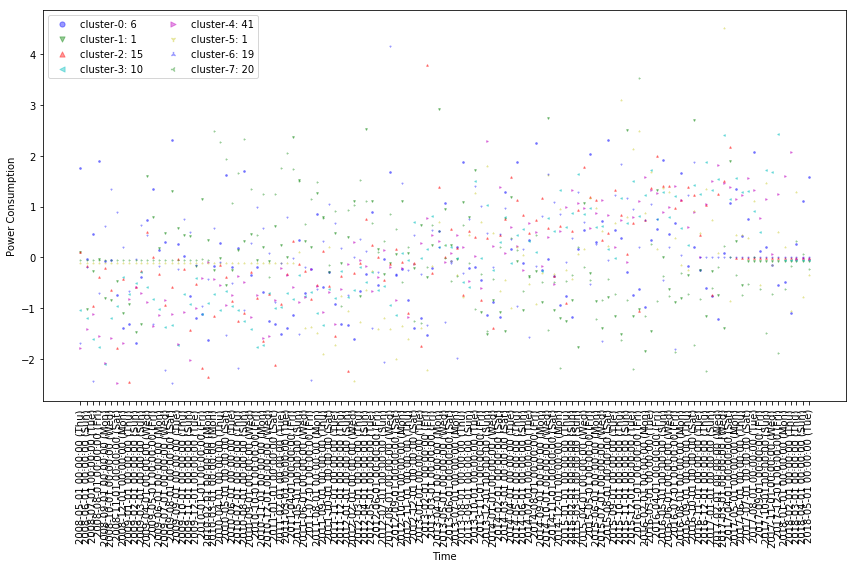

In [43]:
data = []
for cluster_x in ks.cluster_centers_:
    data.append(
        [point_x[0] for point_x in cluster_x]
    )
columns = ['cluster-{}'.format(idx) for idx in range(n_clusters)]
clusters = np.array(data).T
df_clusters = pd.DataFrame(clusters, columns=columns)
 
df_clusters.index = ps.passengers.index

# クラスタに属するデータ数を計算。
cnt = Counter(ks.labels_)
cluster_labels = {}
for k in cnt:
    cluster_labels['cluster-{}'.format(k)] = cnt[k]
 
# グラフを表示。
viz.draw_graphs(df_clusters, cnt=cluster_labels,
            xtick_step='m',
            alpha=0.4)

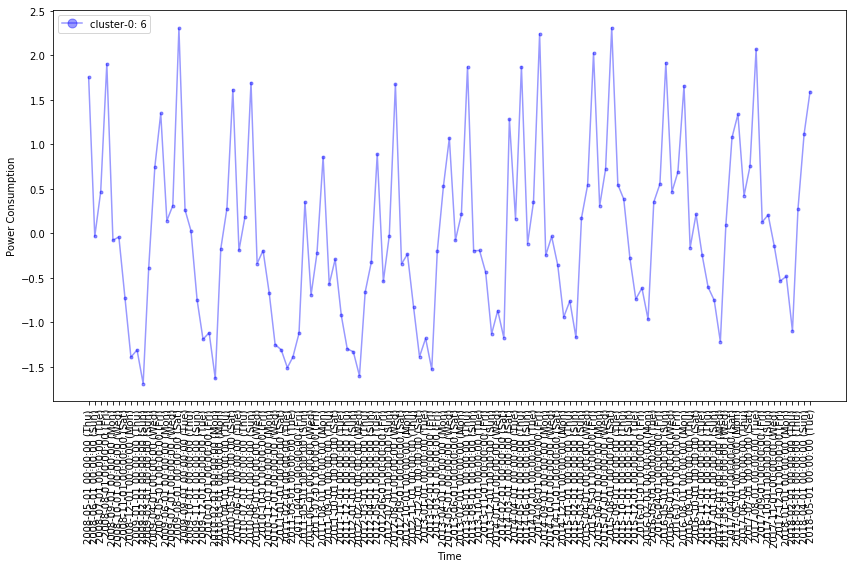

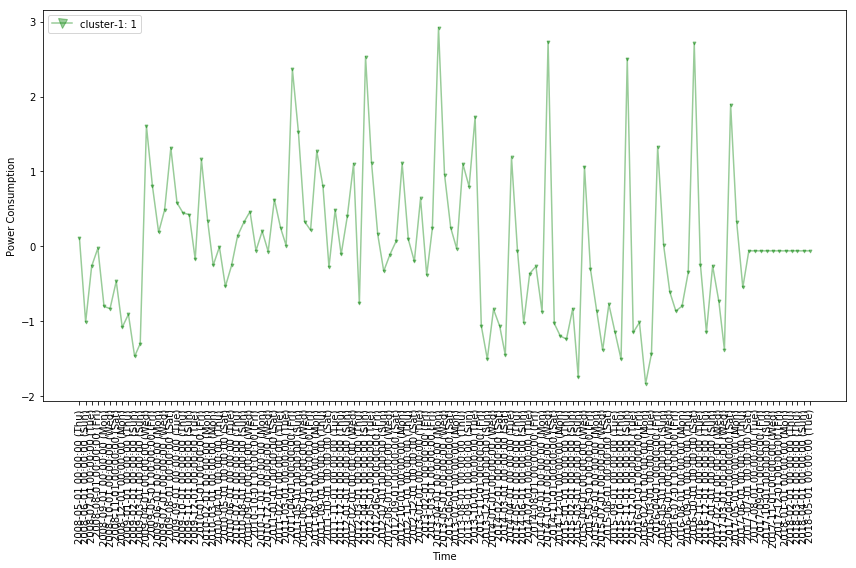

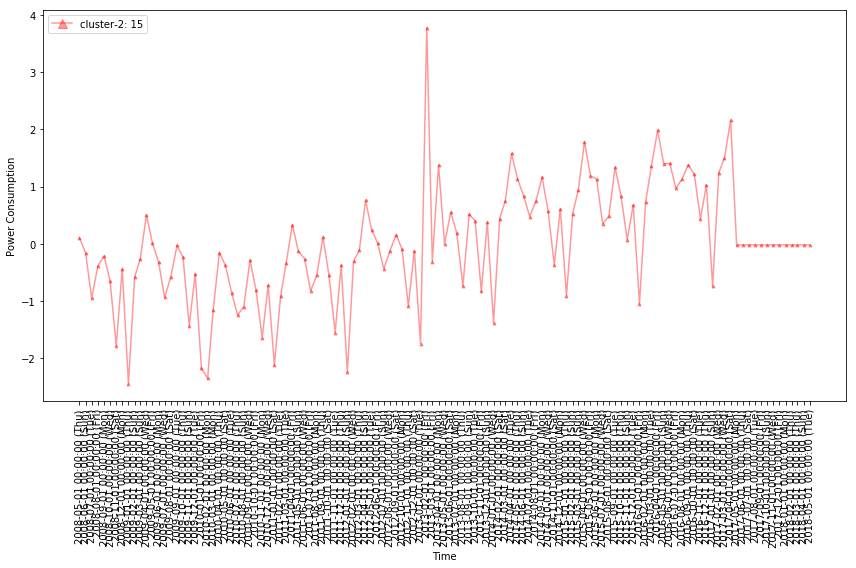

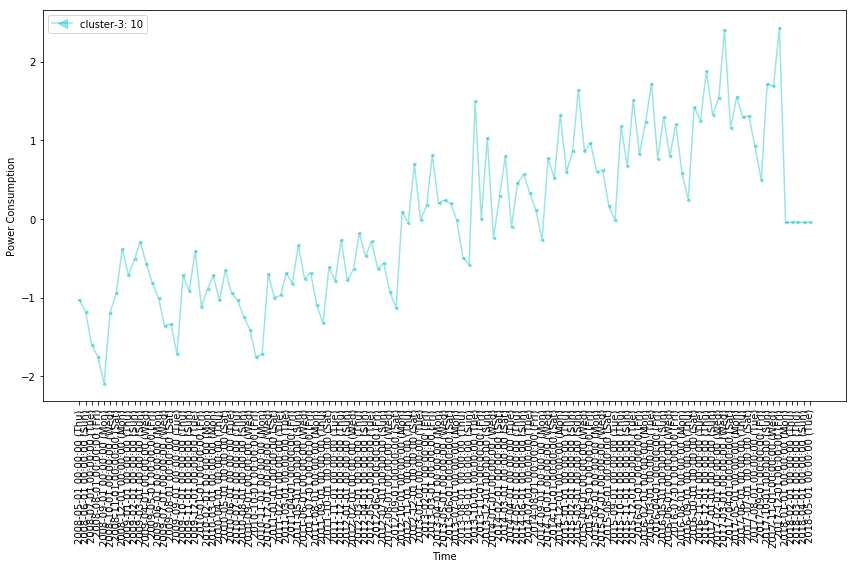

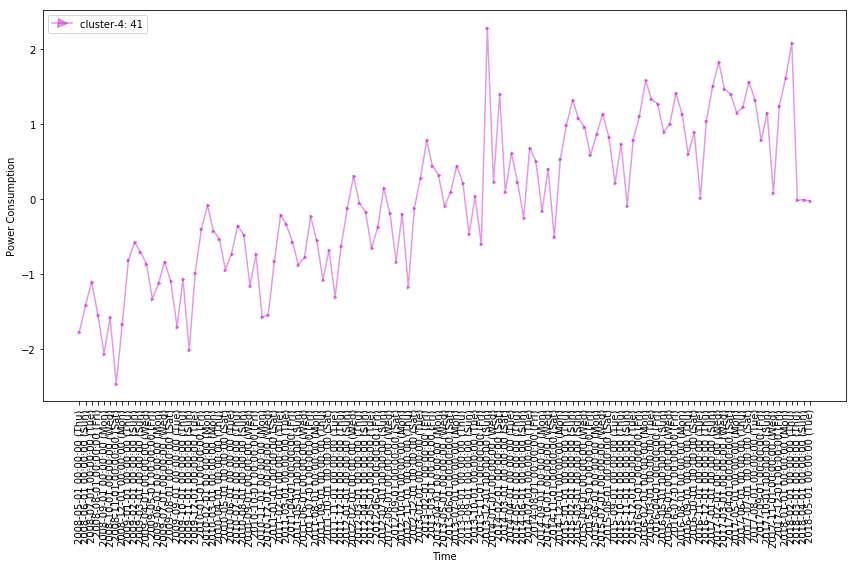

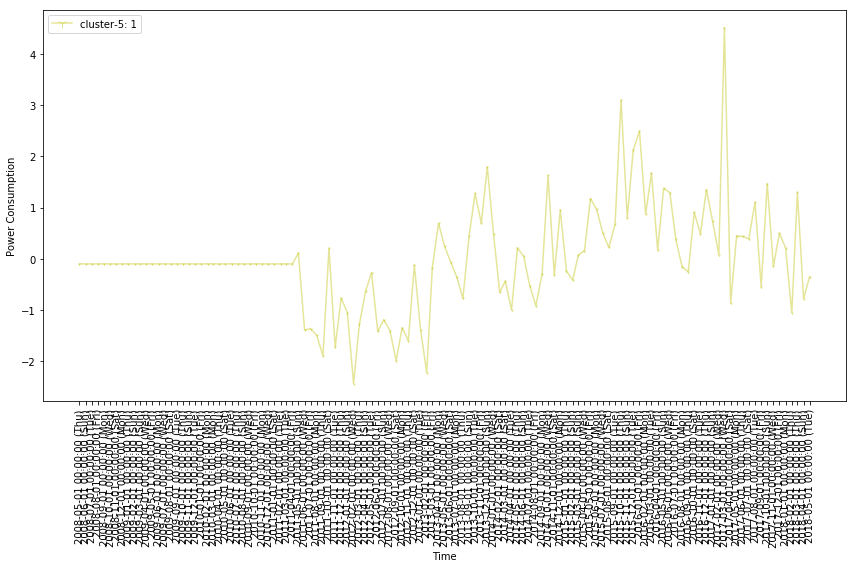

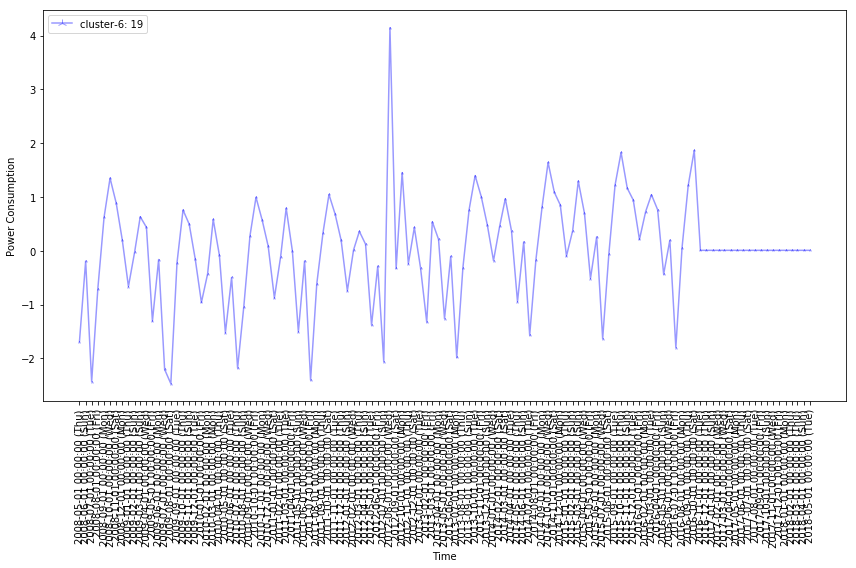

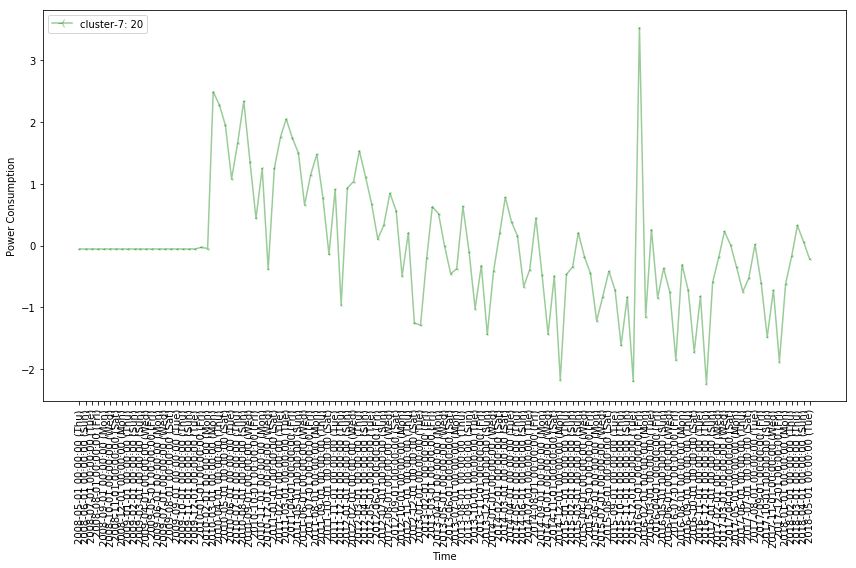

In [44]:
for i in range(8):
    target_clusters = ['cluster-{}'.format(idx) for idx in [i]]
    filtered_df_clusters = df_clusters[target_clusters]

    viz.draw_graphs(filtered_df_clusters,
                    cnt=cluster_labels,
                    xtick_step='m',
                    scatter=False,
                    alpha=0.4)

In [45]:
for i in range(8):
    print("cluster " + str(i))
    tmp_df = []
    for j, label in enumerate(ks.labels_):
        if label == i:
            tmp_df.append(ps.passengers.columns[j])
    print(tmp_df)

cluster 0
['八景島', '新杉田', '海の公園\n南口', '海の公園\n柴口', '野島公園', '関内']
cluster 1
['恩田']
cluster 2
['上大岡', '井土ヶ谷', '京急新子安', '和田町', '戸部', '東白楽', '横浜', '江田', '生麦', '田奈', '綱島', '藤が丘', '踊場', '長津田', '鳥浜']
cluster 3
['みなとみらい', '並木中央', '元町・中華街', '新横浜', '日本大通り', '桜木町', '神奈川新町', '阪東橋', '馬車道', '高島町']
cluster 4
['こどもの国', 'たまプラーザ', 'ゆめが丘', 'センター北', 'センター南', '三ツ沢上町', '三ツ沢下町', '上星川', '下飯田', '中山', '中田', '京急鶴見', '仲木戸', '仲町台', '伊勢佐木\n長者町', '北山田', '北新横浜', '吉野町', '大倉山', '岸根公園', '川和町', '市大医学部', '平沼橋', '幸浦', '弘明寺', '戸塚', '新羽', '日吉', '日吉本町', '星川', '東山田', '港南中央', '湘南台', '片倉町', '立場', '舞岡', '菊名', '西横浜', '都筑\nふれあいの丘', '高田', '鶴見市場']
cluster 5
['南部市場']
cluster 6
['あざみ野', 'いずみ中央', '上永谷', '下永谷', '中川', '南万騎が原', '南太田', '妙蓮寺', '市が尾', '希望ケ丘', '杉田', '瀬谷', '白楽', '緑園都市', '能見台', '蒔田', '金沢八景', '青葉台', '鶴ケ峰']
cluster 7
['いずみ野', '三ツ境', '並木北', '二俣川', '京急富岡', '六浦', '反町', '天王町', '子安', '屏風浦', '弥生台', '新高島', '日ﾉ出町', '産業振興\nセンター', '神奈川', '福浦', '花月園前', '西谷', '金沢文庫', '黄金町']


* 傾向が似ている駅として、路線でクラスタリングされる

## Kmeans 

In [46]:
clustering_metric  = 'euclidean'

km = TimeSeriesKMeans(
    n_init=n_init,
    n_clusters=n_clusters,
    metric=clustering_metric,
    random_state=rand_seed)

km.fit(yss)

Init 1
34.883 --> 24.852 --> 24.719 --> 24.659 --> 24.635 --> 24.625 --> 24.625 --> 
Init 3
36.401 --> 24.100 --> 23.129 --> 22.826 --> 22.721 --> 22.637 --> 22.554 --> 22.554 --> 


TimeSeriesKMeans(dtw_inertia=False, max_iter=50, max_iter_barycenter=100,
         metric='euclidean', metric_params=None, n_clusters=8, n_init=3,
         random_state=13, tol=1e-06, verbose=True)

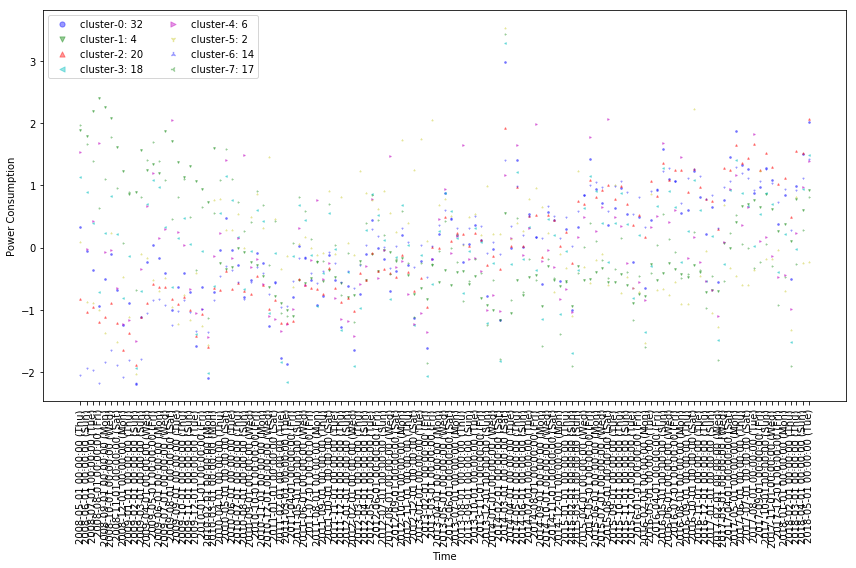

In [47]:
data = []
for cluster_x in km.cluster_centers_:
    data.append(
        [point_x[0] for point_x in cluster_x]
    )
columns = ['cluster-{}'.format(idx) for idx in range(n_clusters)]
clusters = np.array(data).T
df_clusters = pd.DataFrame(clusters, columns=columns)
 
df_clusters.index = ps.passengers.index

# クラスタに属するデータ数を計算。
cnt = Counter(km.labels_)
cluster_labels = {}
for k in cnt:
    cluster_labels['cluster-{}'.format(k)] = cnt[k]
 
# グラフを表示。
viz.draw_graphs(df_clusters, cnt=cluster_labels,
            xtick_step='m',
            alpha=0.4)

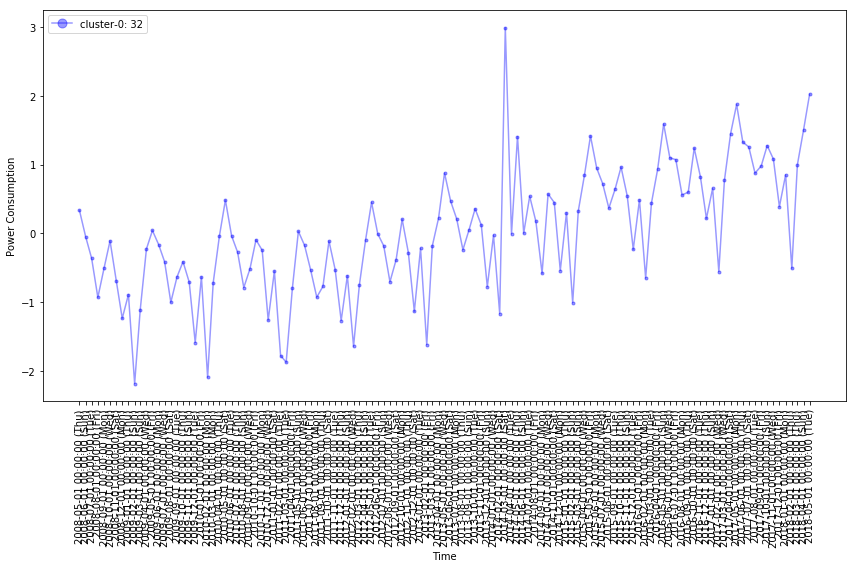

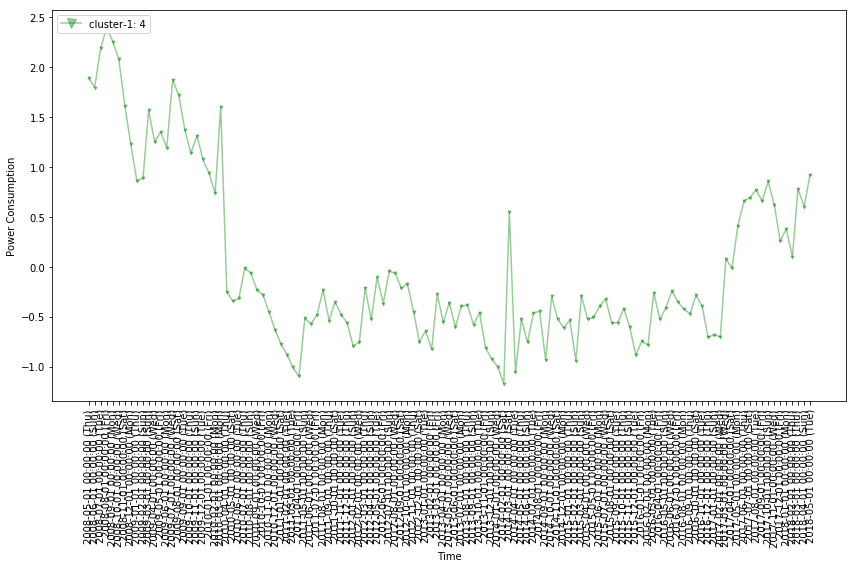

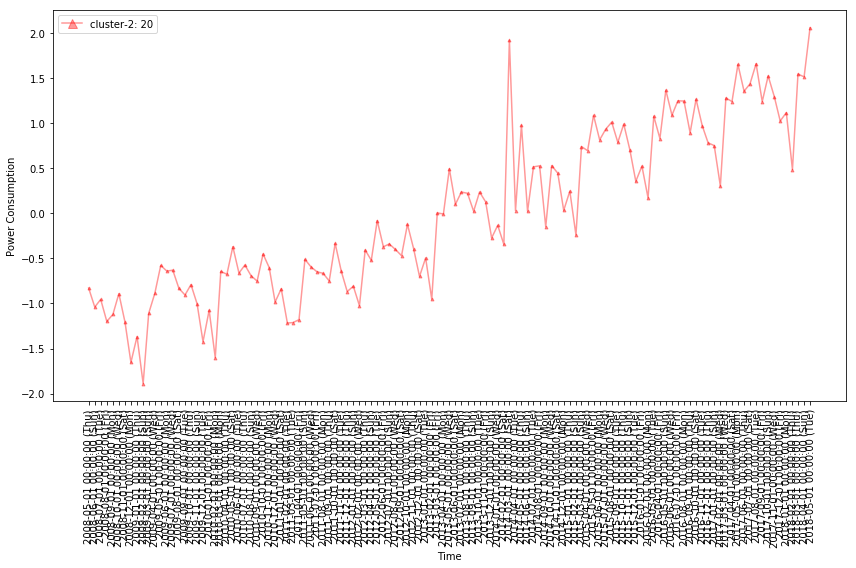

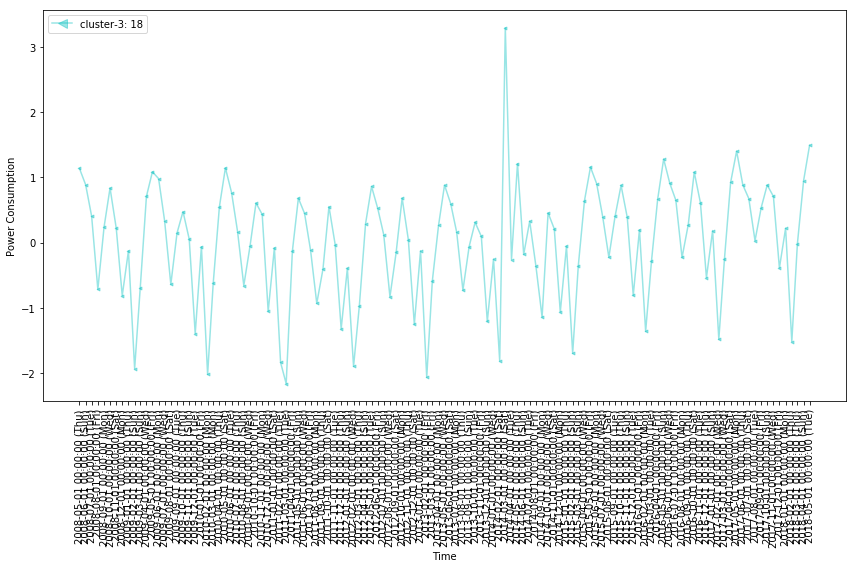

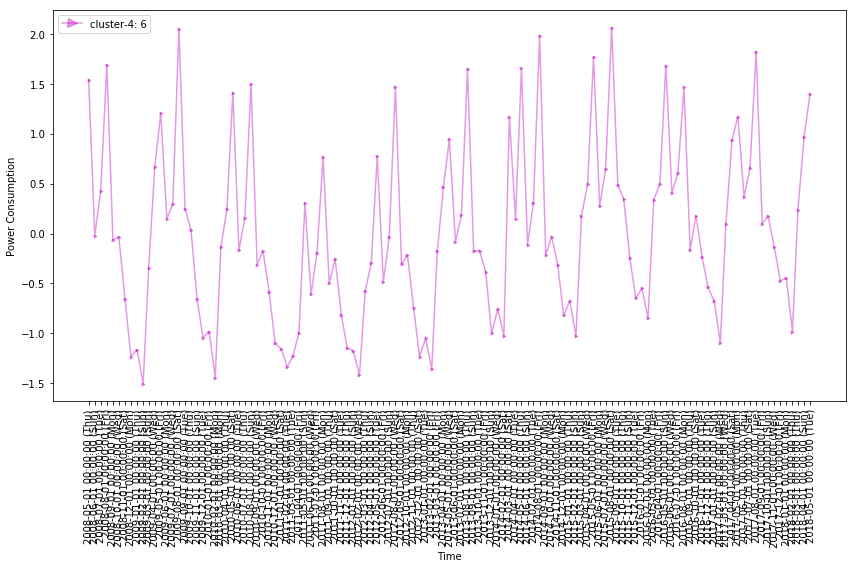

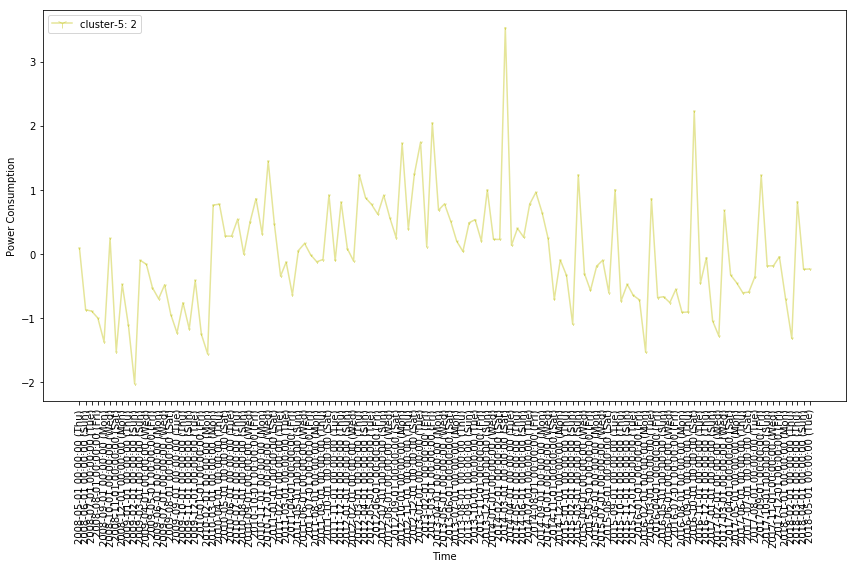

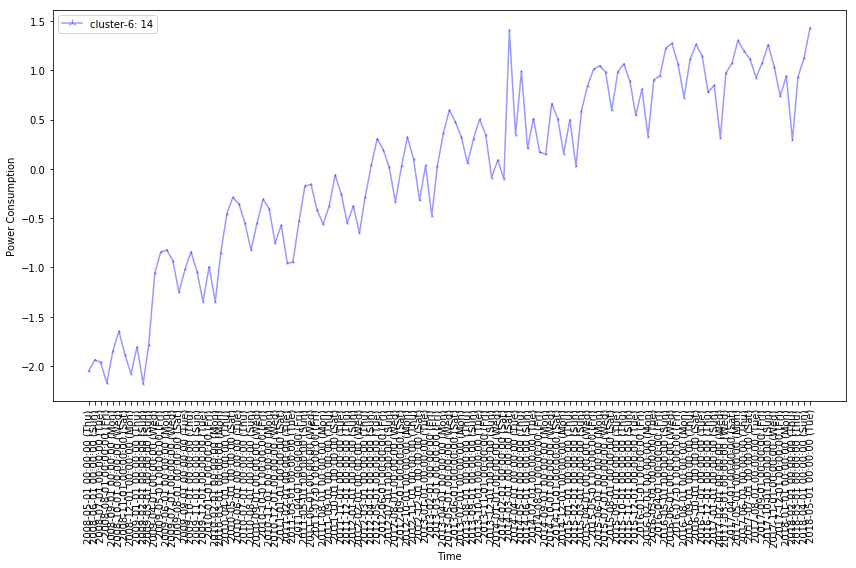

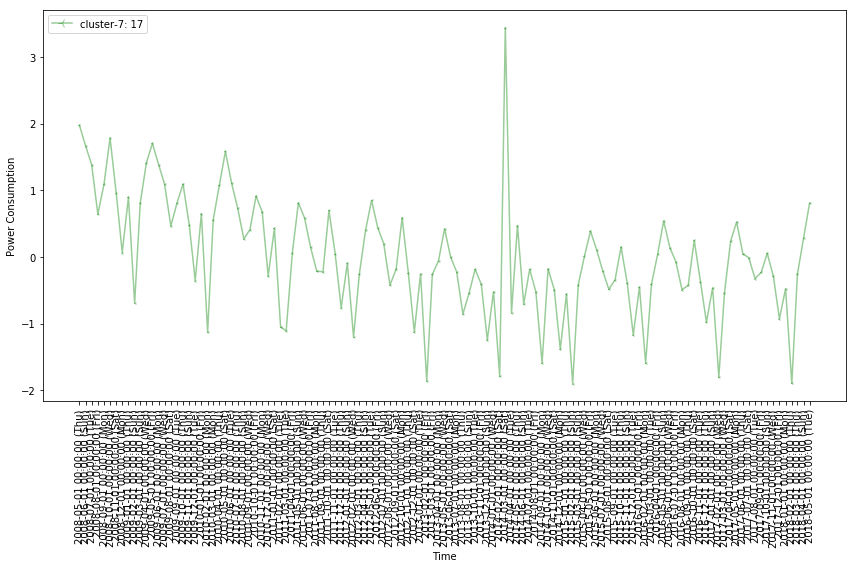

In [48]:
for i in range(8):
    target_clusters = ['cluster-{}'.format(idx) for idx in [i]]
    filtered_df_clusters = df_clusters[target_clusters]

    viz.draw_graphs(filtered_df_clusters,
                    cnt=cluster_labels,
                    xtick_step='m',
                    scatter=False,
                    alpha=0.4)

In [50]:
for i in range(8):
    print("cluster " + str(i))
    tmp_df = []
    for j, label in enumerate(km.labels_):
        if label == i:
            tmp_df.append(ps.passengers.columns[j])
    print(tmp_df)

cluster 0
['こどもの国', '三ツ沢上町', '三ツ沢下町', '上大岡', '上星川', '並木中央', '中田', '井土ヶ谷', '京急新子安', '仲町台', '和田町', '大倉山', '岸根公園', '弘明寺', '戸塚', '戸部', '星川', '東白楽', '横浜', '江田', '湘南台', '片倉町', '生麦', '田奈', '立場', '綱島', '菊名', '藤が丘', '踊場', '長津田', '鳥浜', '鶴見市場']
cluster 1
['新高島', '産業振興\nセンター', '福浦', '花月園前']
cluster 2
['たまプラーザ', 'みなとみらい', '下飯田', '京急鶴見', '仲木戸', '元町・中華街', '吉野町', '市大医学部', '平沼橋', '幸浦', '新横浜', '新羽', '日本大通り', '桜木町', '港南中央', '神奈川新町', '西横浜', '阪東橋', '馬車道', '高島町']
cluster 3
['あざみ野', 'いずみ中央', '下永谷', '中川', '南万騎が原', '南太田', '妙蓮寺', '市が尾', '希望ケ丘', '杉田', '瀬谷', '白楽', '緑園都市', '能見台', '蒔田', '金沢八景', '青葉台', '鶴ケ峰']
cluster 4
['八景島', '新杉田', '海の公園\n南口', '海の公園\n柴口', '野島公園', '関内']
cluster 5
['南部市場', '恩田']
cluster 6
['ゆめが丘', 'センター北', 'センター南', '中山', '伊勢佐木\n長者町', '北山田', '北新横浜', '川和町', '日吉', '日吉本町', '東山田', '舞岡', '都筑\nふれあいの丘', '高田']
cluster 7
['いずみ野', '三ツ境', '上永谷', '並木北', '二俣川', '京急富岡', '六浦', '反町', '天王町', '子安', '屏風浦', '弥生台', '日ﾉ出町', '神奈川', '西谷', '金沢文庫', '黄金町']


# 標準化しない場合

In [51]:
yss = to_time_series_dataset(ps.passengers.values.T)
# yss = TimeSeriesScalerMeanVariance(mu=0.0, std=1.0).fit_transform(yss)

## Kshape

In [52]:
n_clusters  = 8
n_init = 3
rand_seed  = 13

ks = KShape(n_clusters=n_clusters,
            n_init=n_init,
            verbose=True,
            random_state=rand_seed)

ks.fit(yss)

Init 1


/Users/toh/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)


1.000 --> 1.000 --> 1.000 --> 
Init 2
1.000 --> 1.000 --> 1.000 --> 
Init 3
1.000 --> 1.000 --> 1.000 --> 


KShape(max_iter=100, n_clusters=8, n_init=3, random_state=13, tol=1e-06,
    verbose=True)

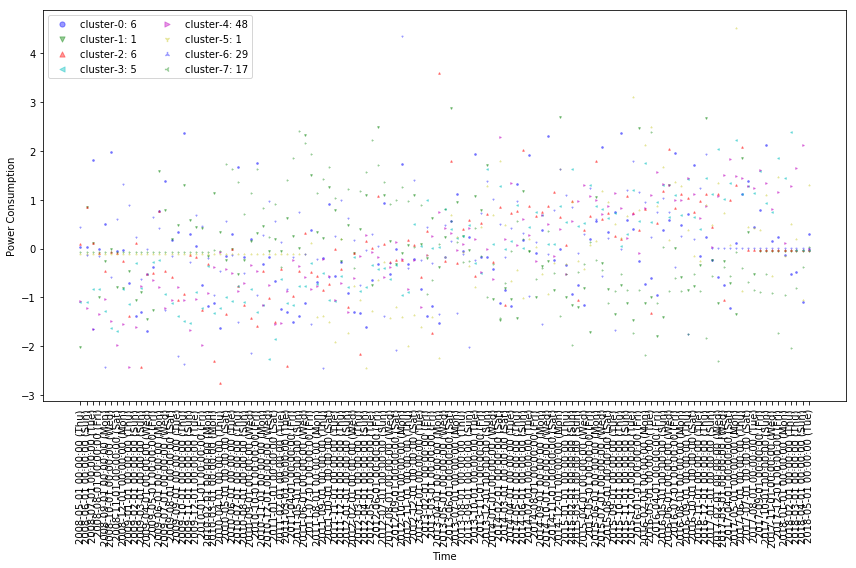

In [53]:
data = []
for cluster_x in ks.cluster_centers_:
    data.append(
        [point_x[0] for point_x in cluster_x]
    )
columns = ['cluster-{}'.format(idx) for idx in range(n_clusters)]
clusters = np.array(data).T
df_clusters = pd.DataFrame(clusters, columns=columns)
 
df_clusters.index = ps.passengers.index

# クラスタに属するデータ数を計算。
cnt = Counter(ks.labels_)
cluster_labels = {}
for k in cnt:
    cluster_labels['cluster-{}'.format(k)] = cnt[k]
 
# グラフを表示。
viz.draw_graphs(df_clusters, cnt=cluster_labels,
            xtick_step='m',
            alpha=0.4)

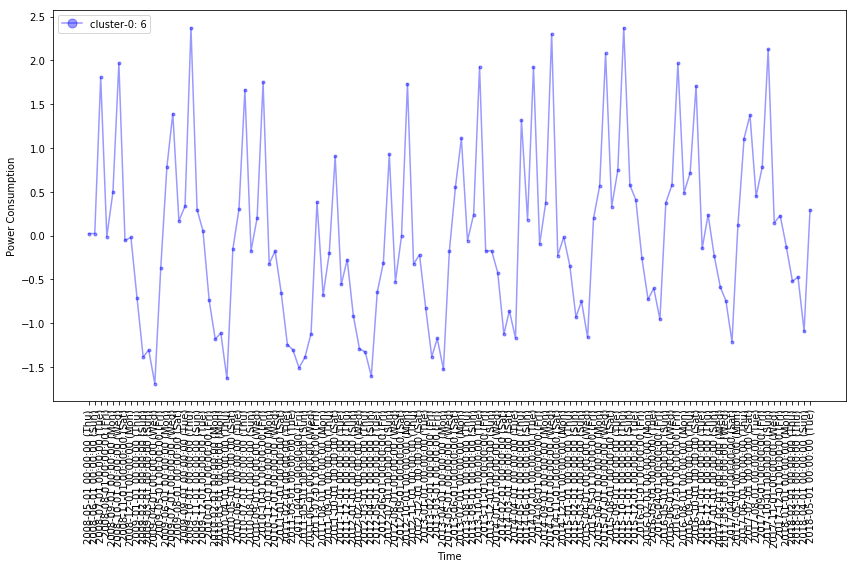

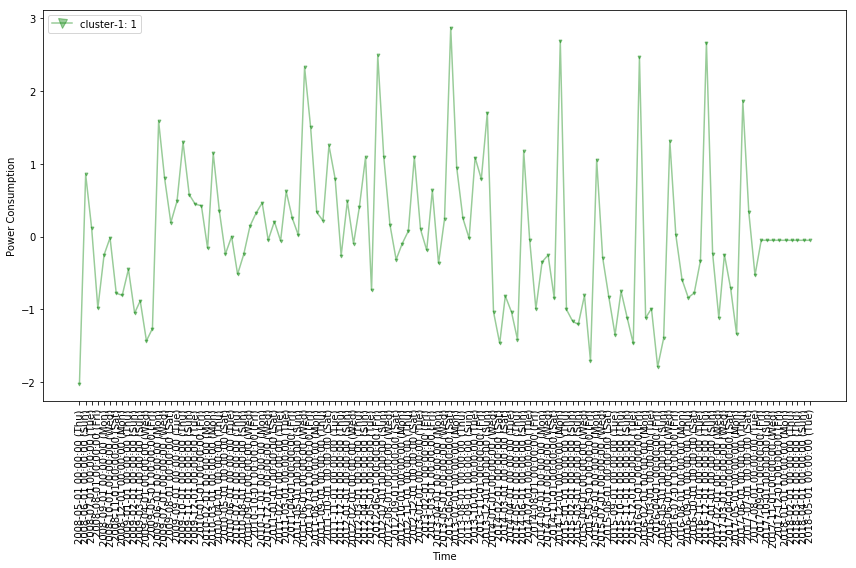

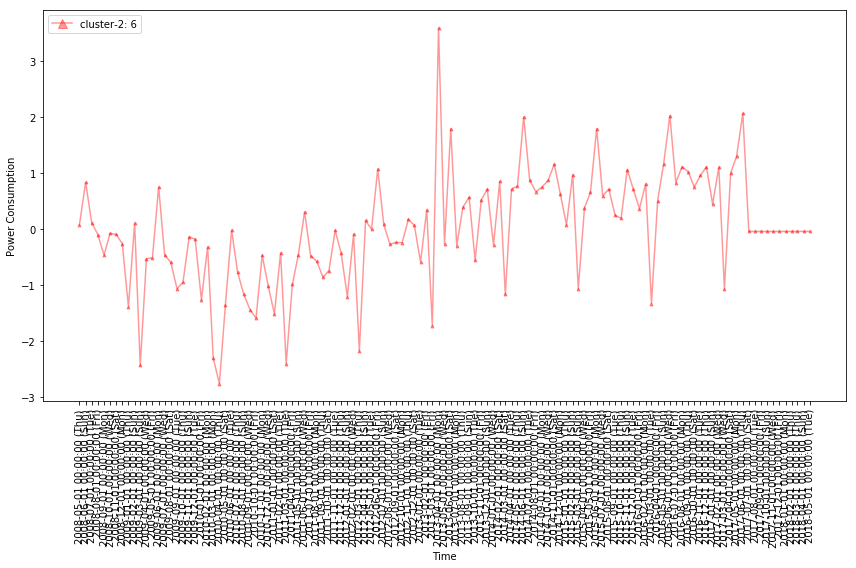

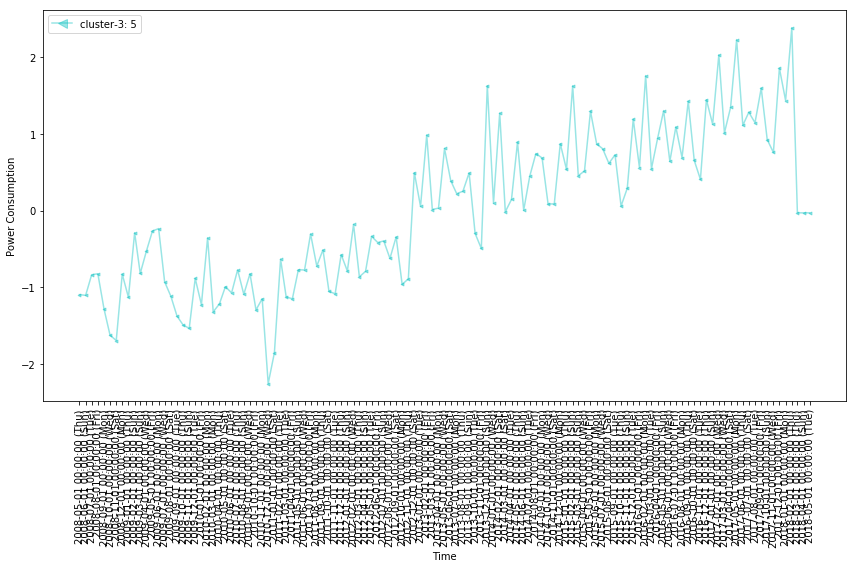

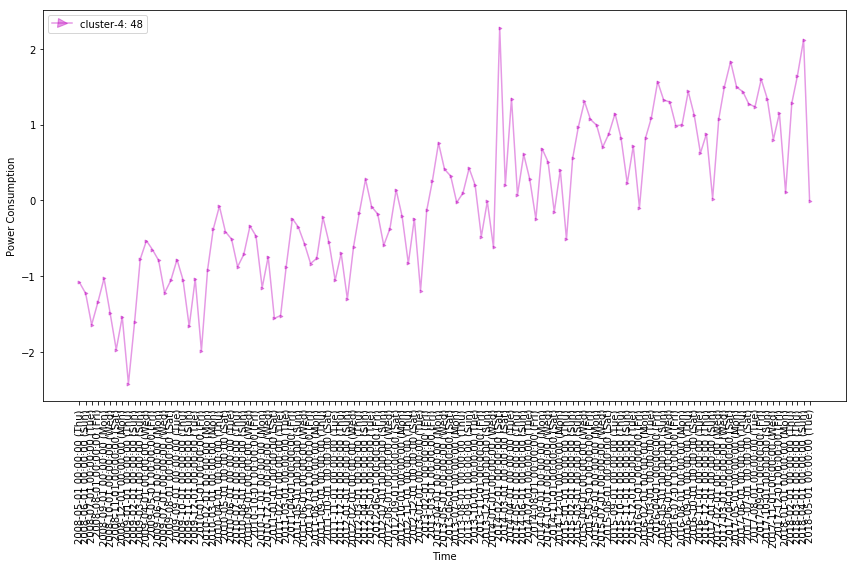

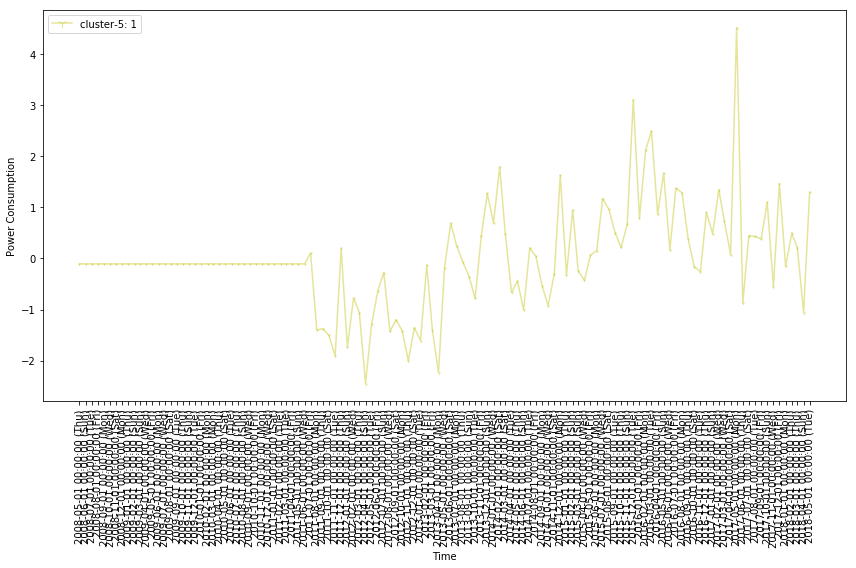

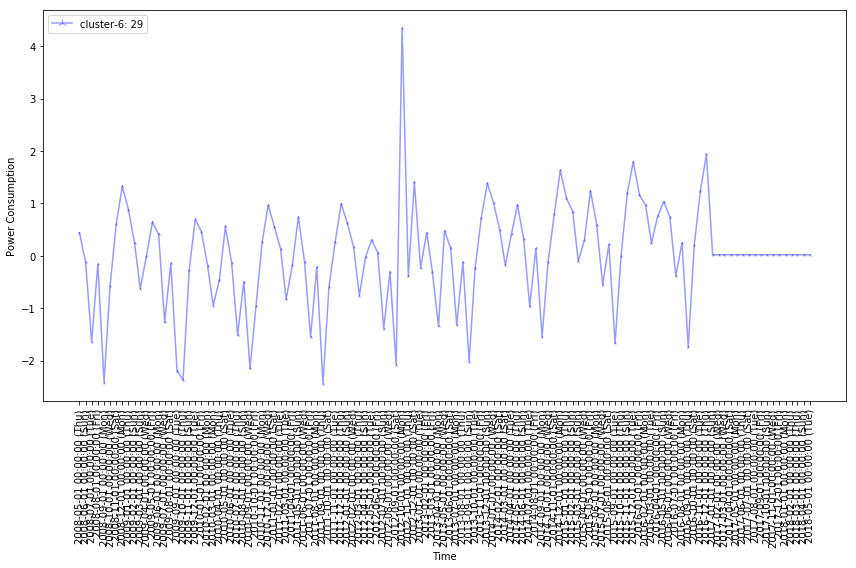

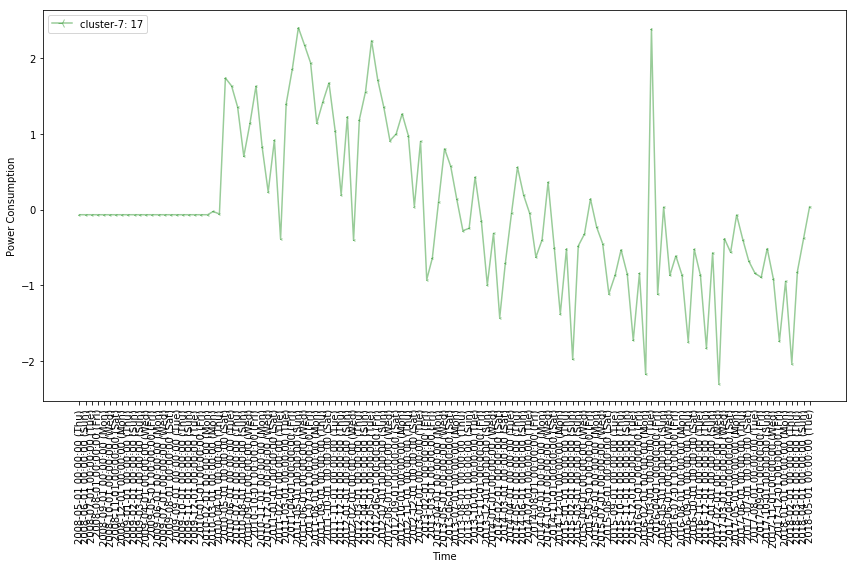

In [54]:
for i in range(8):
    target_clusters = ['cluster-{}'.format(idx) for idx in [i]]
    filtered_df_clusters = df_clusters[target_clusters]

    viz.draw_graphs(filtered_df_clusters,
                    cnt=cluster_labels,
                    xtick_step='m',
                    scatter=False,
                    alpha=0.4)

In [55]:
for i in range(8):
    print("cluster " + str(i))
    tmp_df = []
    for j, label in enumerate(ks.labels_):
        if label == i:
            tmp_df.append(ps.passengers.columns[j])
    print(tmp_df)

cluster 0
['八景島', '新杉田', '海の公園\n南口', '海の公園\n柴口', '野島公園', '関内']
cluster 1
['恩田']
cluster 2
['井土ヶ谷', '横浜', '江田', '綱島', '蒔田', '鳥浜']
cluster 3
['みなとみらい', '元町・中華街', '日本大通り', '馬車道', '高島町']
cluster 4
['こどもの国', 'たまプラーザ', 'ゆめが丘', 'センター北', 'センター南', '三ツ沢上町', '三ツ沢下町', '上星川', '下飯田', '並木中央', '中山', '中田', '京急鶴見', '仲木戸', '仲町台', '伊勢佐木\n長者町', '北山田', '北新横浜', '吉野町', '和田町', '大倉山', '岸根公園', '川和町', '市大医学部', '平沼橋', '幸浦', '弘明寺', '戸塚', '戸部', '新横浜', '新羽', '日吉', '日吉本町', '星川', '東山田', '桜木町', '港南中央', '湘南台', '片倉町', '神奈川新町', '立場', '舞岡', '菊名', '西横浜', '都筑\nふれあいの丘', '阪東橋', '高田', '鶴見市場']
cluster 5
['南部市場']
cluster 6
['あざみ野', 'いずみ中央', '三ツ境', '上大岡', '上永谷', '下永谷', '中川', '京急新子安', '南万騎が原', '南太田', '妙蓮寺', '屏風浦', '市が尾', '希望ケ丘', '杉田', '東白楽', '瀬谷', '生麦', '田奈', '白楽', '緑園都市', '能見台', '藤が丘', '西谷', '踊場', '金沢八景', '長津田', '青葉台', '鶴ケ峰']
cluster 7
['いずみ野', '並木北', '二俣川', '京急富岡', '六浦', '反町', '天王町', '子安', '弥生台', '新高島', '日ﾉ出町', '産業振興\nセンター', '神奈川', '福浦', '花月園前', '金沢文庫', '黄金町']


## Kmeans

In [56]:
clustering_metric  = 'euclidean'

km = TimeSeriesKMeans(
    n_init=n_init,
    n_clusters=n_clusters,
    metric=clustering_metric,
    random_state=rand_seed)

km.fit(yss)

Init 1
1861690827217.204 --> 1175780360304.777 --> 1110672313657.465 --> 1104333260796.094 --> 1101976410962.521 --> 1101976410962.521 --> 
Init 3
1559411234488.938 --> 1132083380706.031 --> 1122362015723.024 --> 1117669038096.356 --> 1115245872557.247 --> 1115245872557.247 --> 


TimeSeriesKMeans(dtw_inertia=False, max_iter=50, max_iter_barycenter=100,
         metric='euclidean', metric_params=None, n_clusters=8, n_init=3,
         random_state=13, tol=1e-06, verbose=True)

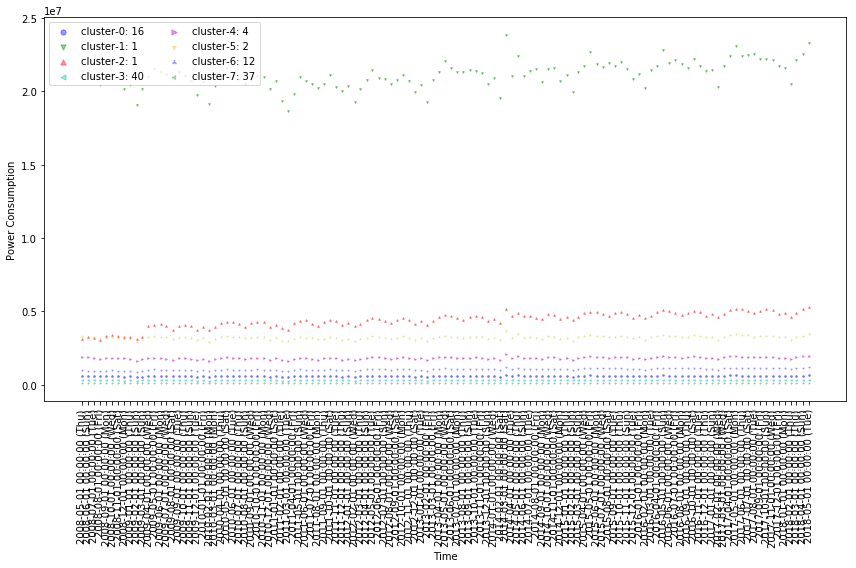

In [57]:
data = []
for cluster_x in km.cluster_centers_:
    data.append(
        [point_x[0] for point_x in cluster_x]
    )
columns = ['cluster-{}'.format(idx) for idx in range(n_clusters)]
clusters = np.array(data).T
df_clusters = pd.DataFrame(clusters, columns=columns)
 
df_clusters.index = ps.passengers.index

# クラスタに属するデータ数を計算。
cnt = Counter(km.labels_)
cluster_labels = {}
for k in cnt:
    cluster_labels['cluster-{}'.format(k)] = cnt[k]
 
# グラフを表示。
viz.draw_graphs(df_clusters, cnt=cluster_labels,
            xtick_step='m',
            alpha=0.4)

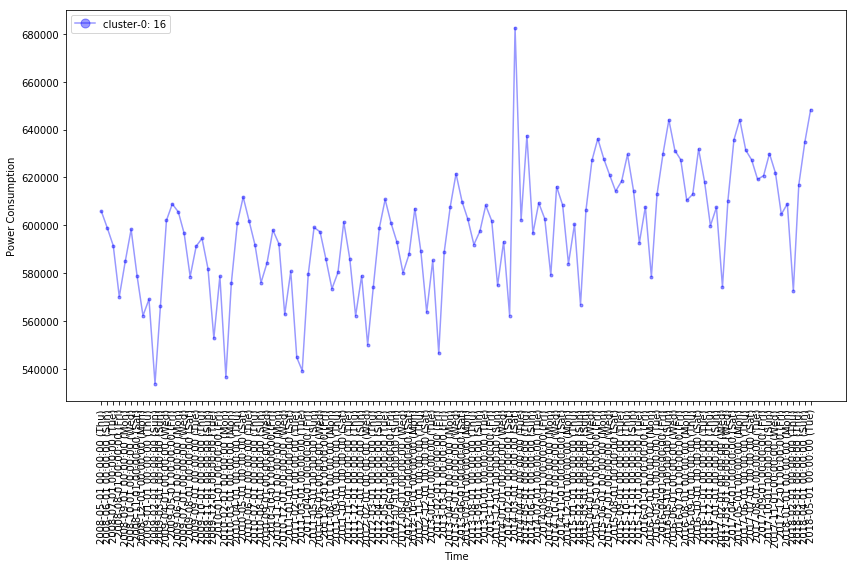

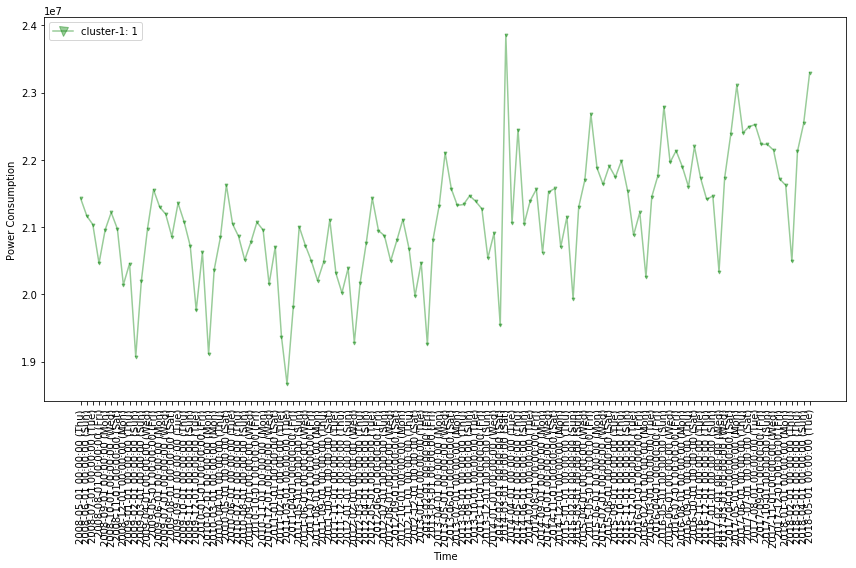

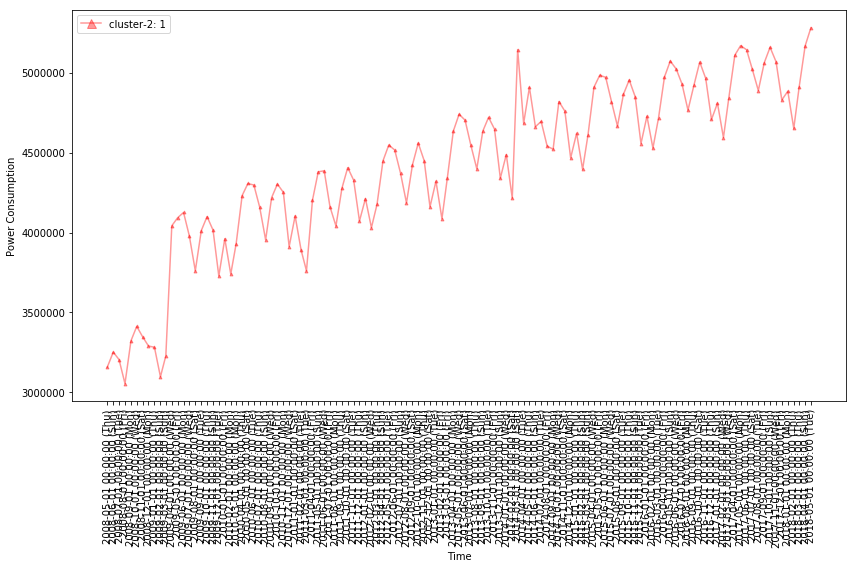

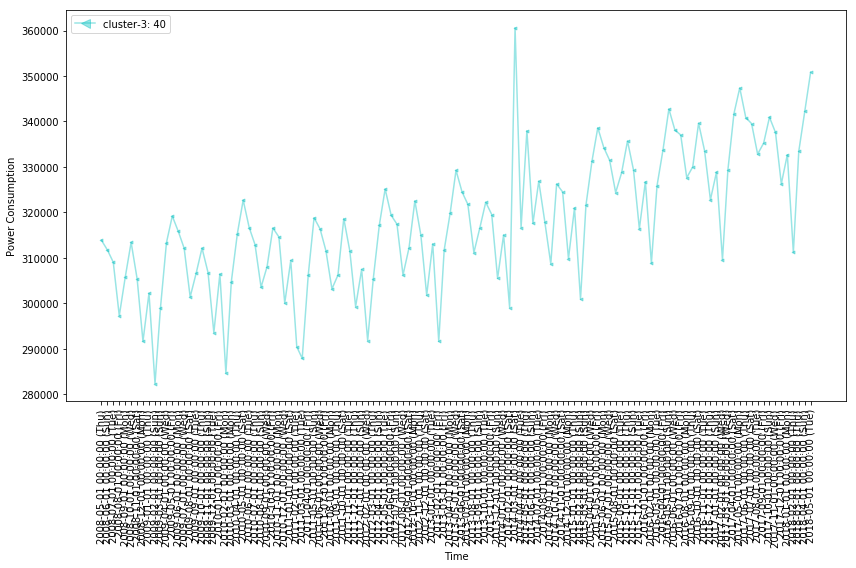

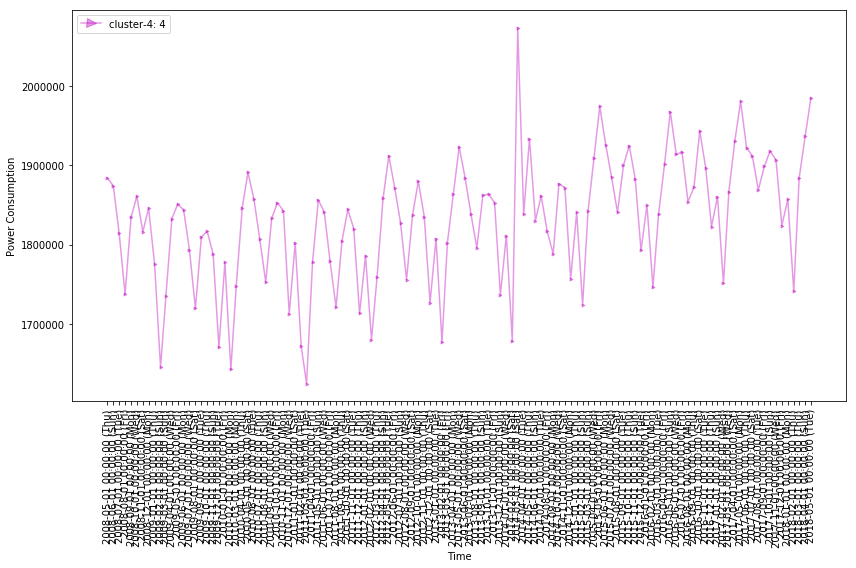

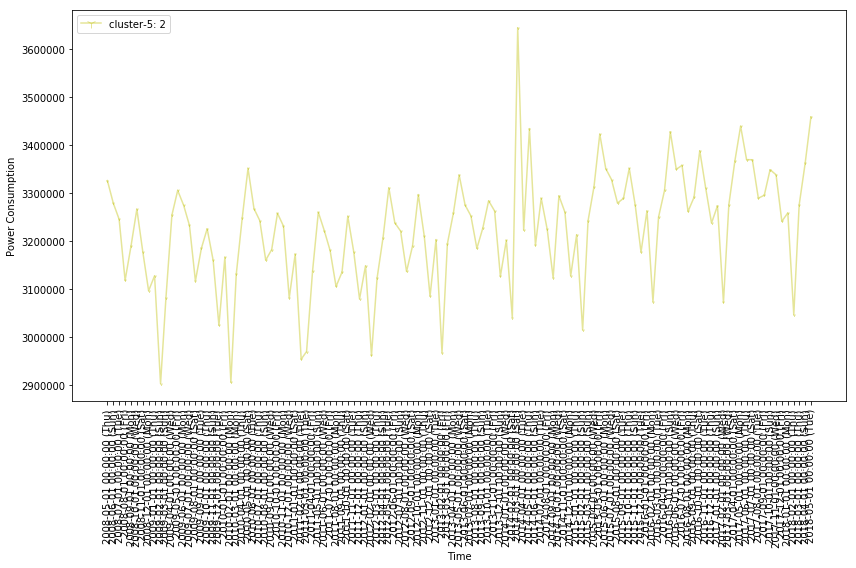

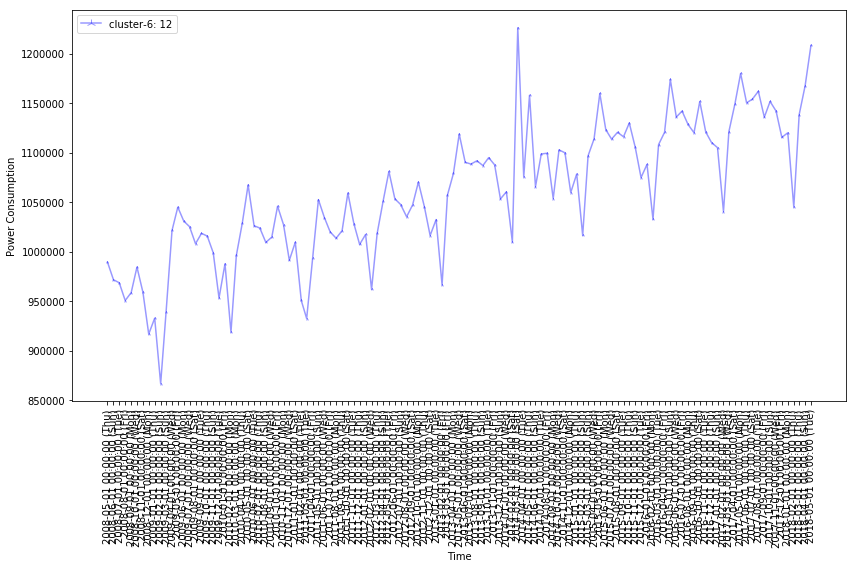

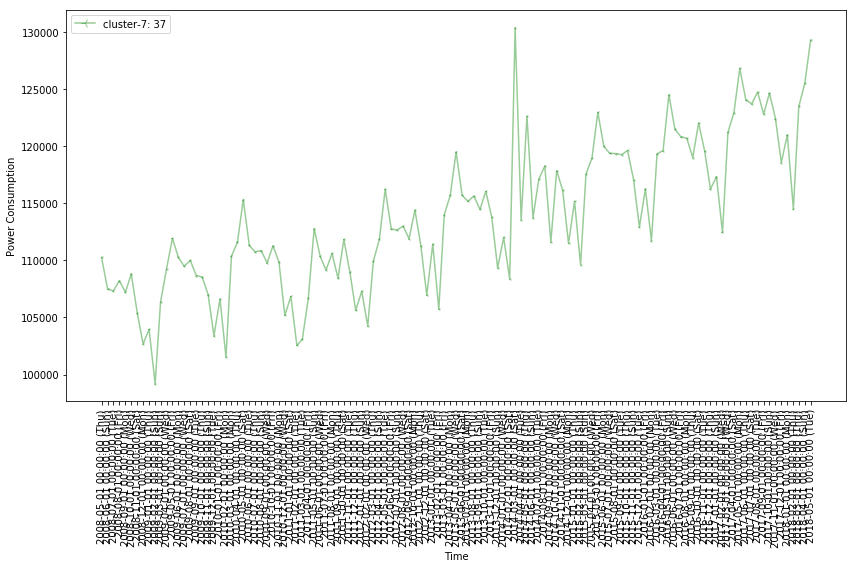

In [58]:
for i in range(8):
    target_clusters = ['cluster-{}'.format(idx) for idx in [i]]
    filtered_df_clusters = df_clusters[target_clusters]

    viz.draw_graphs(filtered_df_clusters,
                    cnt=cluster_labels,
                    xtick_step='m',
                    scatter=False,
                    alpha=0.4)

In [59]:
for i in range(8):
    print("cluster " + str(i))
    tmp_df = []
    for j, label in enumerate(km.labels_):
        if label == i:
            tmp_df.append(ps.passengers.columns[j])
    print(tmp_df)

cluster 0
['上永谷', '仲町台', '大倉山', '市が尾', '希望ケ丘', '弘明寺', '新杉田', '杉田', '桜木町', '江田', '湘南台', '瀬谷', '白楽', '能見台', '関内', '馬車道']
cluster 1
['横浜']
cluster 2
['日吉']
cluster 3
['いずみ中央', 'いずみ野', '三ツ沢上町', '上星川', '中山', '中川', '中田', '井土ヶ谷', '京急富岡', '京急鶴見', '仲木戸', '伊勢佐木\n長者町', '六浦', '北山田', '南太田', '吉野町', '和田町', '天王町', '妙蓮寺', '屏風浦', '弥生台', '戸部', '新羽', '日本大通り', '日ﾉ出町', '星川', '港南中央', '片倉町', '生麦', '神奈川新町', '立場', '緑園都市', '蒔田', '藤が丘', '西谷', '踊場', '都筑\nふれあいの丘', '阪東橋', '鶴見市場', '黄金町']
cluster 4
['綱島', '菊名', '長津田', '青葉台']
cluster 5
['あざみ野', '上大岡']
cluster 6
['たまプラーザ', 'みなとみらい', 'センター北', 'センター南', '三ツ境', '二俣川', '元町・中華街', '戸塚', '新横浜', '金沢八景', '金沢文庫', '鶴ケ峰']
cluster 7
['こどもの国', 'ゆめが丘', '三ツ沢下町', '下永谷', '下飯田', '並木中央', '並木北', '京急新子安', '八景島', '北新横浜', '南万騎が原', '南部市場', '反町', '子安', '岸根公園', '川和町', '市大医学部', '平沼橋', '幸浦', '恩田', '新高島', '日吉本町', '東山田', '東白楽', '海の公園\n南口', '海の公園\n柴口', '産業振興\nセンター', '田奈', '神奈川', '福浦', '舞岡', '花月園前', '西横浜', '野島公園', '高島町', '高田', '鳥浜']


* 正規化していない場合のkmeansは、波形ではなく大きさでクラスタリングするため、横浜駅クラスタができる
* 駅の大きさでだいたいクラスタリングされる